In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv(r"D:\My_Project\Analyse\AI_Based_Business_Analyzer\data\raw\sample_sales.csv", encoding='latin1')

In [29]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64


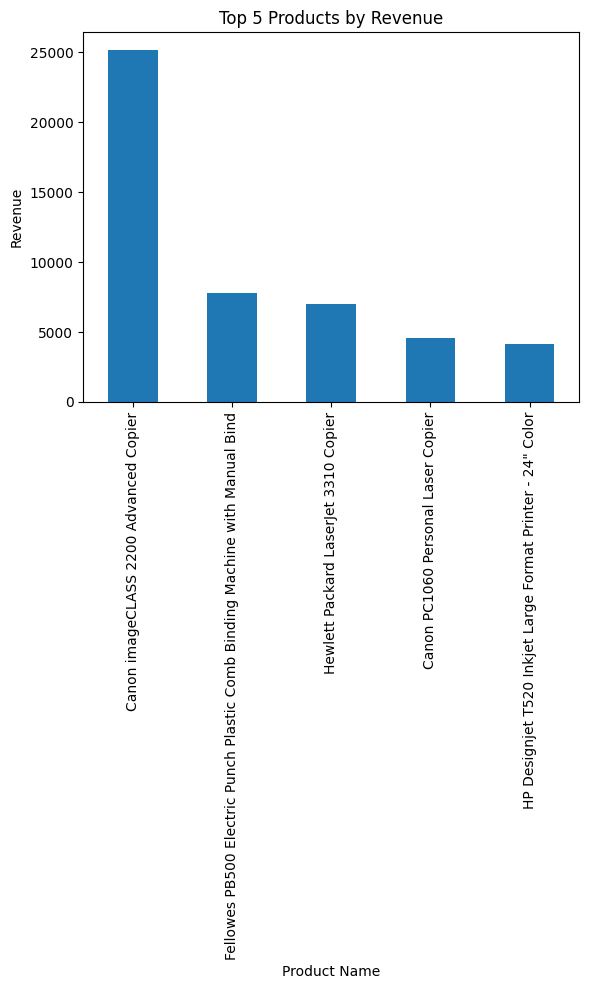

In [30]:
top_products.plot(kind='bar', title="Top 5 Products by Revenue")
plt.ylabel("Revenue")

plt.savefig(r"D:\My_Project\Analyse\AI_Based_Business_Analyzer\figures\Top 5 Products by Revenue.png")
plt.show()

In [31]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)


Month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160
2017-

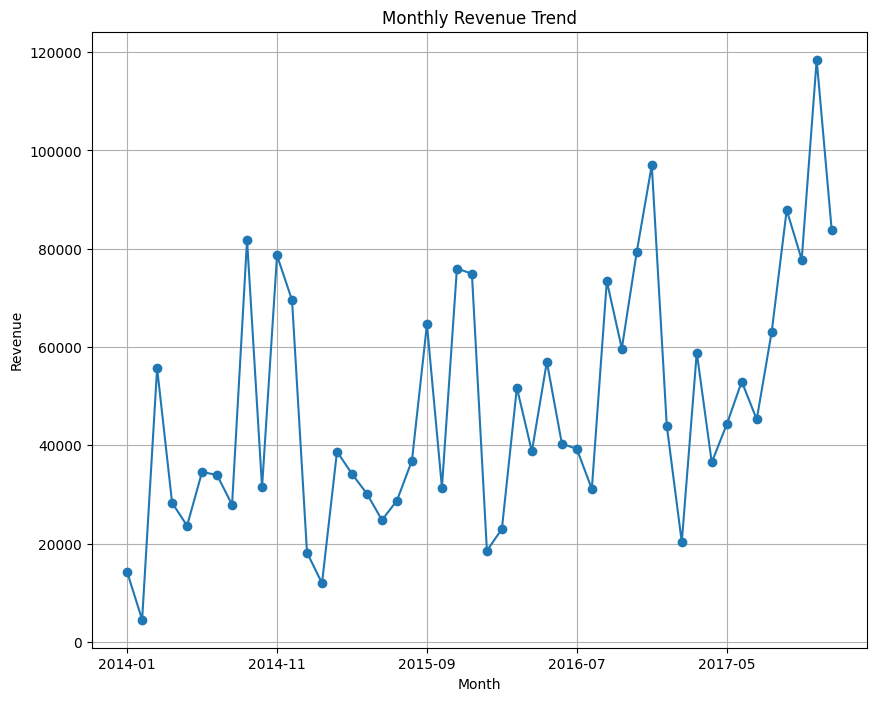

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()
plt.figure(figsize=(10,8))
monthly_sales.plot(kind='line', marker='o', title="Monthly Revenue Trend")

plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)

plt.savefig(r"D:\My_Project\Analyse\AI_Based_Business_Analyzer\figures\Monthly Revenue Trend.png")
plt.show()


In [33]:
import datetime as dt
from sklearn.cluster import KMeans

df['Order Date'] = pd.to_datetime(df['Order Date'])

today = dt.datetime(2024, 12, 31)

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (today - x.max()).days,  
    'Order ID': 'count',                             
    'Sales': 'sum'                              
              
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm)
print(rfm.groupby('Cluster').mean())




             Recency  Frequency      Monetary
Cluster                                      
0        2729.371542  10.221344   1464.669977
1        2696.980000  19.540000  10265.002780
2        2653.995781  16.223629   4400.116932
